In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the Dataset

In [2]:
data = pd.read_csv('diabetic_data.csv', keep_default_na=False)


## Data Discovery

In [187]:
data.shape

(101766, 50)

In [4]:
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,28236,36900,40926,42570,62256,73578,77076,84222,89682,148530
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939,89869032,77391171,85504905,77586282,49726791,86328819,92519352,108662661,107389323,69422211
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,AfricanAmerican,Caucasian,AfricanAmerican,?
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female,Female,Male,Female,Male,Female,Male,Male,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),[40-50),[60-70),[40-50),[80-90),[60-70),[60-70),[50-60),[50-60),[70-80),[70-80)
weight,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3,1,2,1,1,3,1,1,1,1,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3,1,1,3,6,1,3,1,1,1,6
admission_source_id,1,7,7,7,7,2,2,7,4,4,7,4,7,7,2,7,7,7,7,2
time_in_hospital,1,3,2,2,1,3,4,5,13,12,9,7,7,10,1,12,4,3,5,6


In [5]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [188]:
df = data.copy()

## Target Variable

In [189]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

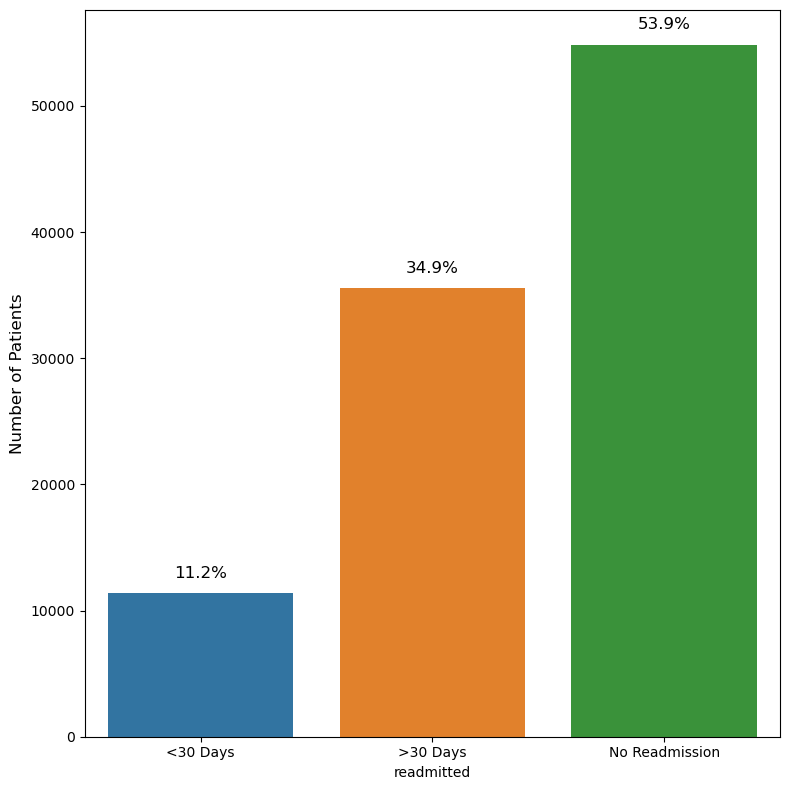

In [190]:
# Get counts and percentages
counts = df['readmitted'].value_counts()
percentages = counts / counts.sum() * 100
order = ['<30', '>30', 'NO']  # desired order for plot

# Plot
plt.figure(figsize=(8, 8))
ax = sns.barplot(x=counts.index, y=counts.values, order=order)

# Add percentage on top of bars
for i, val in enumerate(order):
    count = counts[val]
    pct = percentages[val]
    ax.text(i, count + 1000, f'{pct:.1f}%', 
            ha='center', va='bottom', fontsize=12)

# Customize
plt.ylabel("Number of Patients", fontsize=12)
plt.xticks(ticks=[0,1,2], labels=['<30 Days', '>30 Days', 'No Readmission'])
plt.tight_layout()

# Save as PNG
plt.savefig("Target_Before.png", dpi=300)  

plt.show()

In [191]:
# Convert to binary: 1 if '<30', otherwise 0
df["readmitted"] = np.where(df["readmitted"] == "<30", 1, 0)

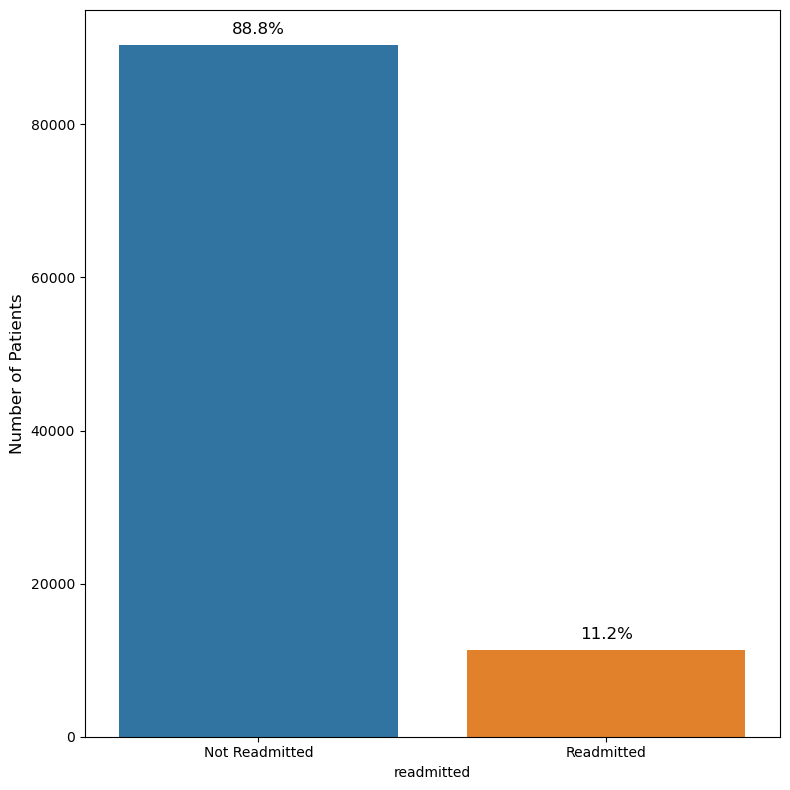

In [192]:
# Calculate percentages
counts = df['readmitted'].value_counts().sort_index()
percentages = counts / counts.sum() * 100
labels = ['Not Readmitted', 'Readmitted']

# Plot
plt.figure(figsize=(8, 8))
ax = sns.barplot(x=counts.index, y=counts.values)

# Annotate bars with percentage on one line
for i, (count, pct) in enumerate(zip(counts, percentages)):
    ax.text(i, count + 1000, f'{pct:.1f}%', 
            ha='center', va='bottom', fontsize=12)

# Customize plot
plt.ylabel("Number of Patients", fontsize=12)
plt.xticks([0, 1], labels)
plt.tight_layout()

# Save as PNG
plt.savefig("Target_After.png", dpi=300) 

plt.show()

In [10]:
df['readmitted'].unique()

array([0, 1])

## Removing duplicates

In [215]:
# The dataset contains multiple inpatients visits for some patients - 
# so the observation could not be considered as statistically independent.
# So, we will only keep one encounter per patient.

In [11]:
df = df.sort_values(by=["patient_nbr", "encounter_id"])  # Sort by patient and encounter order
df = df.drop_duplicates(subset="patient_nbr", keep="first")  # Keep only the first encounter per patient


In [12]:
df.drop(columns=["patient_nbr"], inplace=True)

In [13]:
df.shape

(71518, 49)

## Data Preprocessing

In [14]:
# We don't have null values but gender has "Unknown/Invalid" value, and many columns have '?' in it, 
# so we will further investigate it. 

In [14]:
# Define invalid values to check
invalid_values = ["?", "Unknown/Invalid"]

# Count occurrences of each invalid value in every column
invalid_counts = {value: (df == value).sum() for value in invalid_values}

# Count NaN (null) values
invalid_counts["NaN"] = df.isnull().sum()

# Create a DataFrame to display the counts
invalid_counts_df = pd.DataFrame(invalid_counts)

# Calculate total invalid values per column
invalid_counts_df["Total Invalid"] = invalid_counts_df.sum(axis=1)

# Calculate the percentage of invalid values
invalid_counts_df["Invalid %"] = (invalid_counts_df["Total Invalid"] / len(df)) * 100


# Display the result
print(invalid_counts_df)

                              ?  Unknown/Invalid  NaN  Total Invalid  \
encounter_id                  0                0    0              0   
race                       1948                0    0           1948   
gender                        0                3    0              3   
age                           0                0    0              0   
weight                    68665                0    0          68665   
admission_type_id             0                0    0              0   
discharge_disposition_id      0                0    0              0   
admission_source_id           0                0    0              0   
time_in_hospital              0                0    0              0   
payer_code                31043                0    0          31043   
medical_specialty         34477                0    0          34477   
num_lab_procedures            0                0    0              0   
num_procedures                0                0    0           

## Deal with missing/invalid values - Imputing or Binning

Variable 'weight', 'payer_code', and 'medical_specialty' contains more than 40% of missing data (?) so there is no significance in filling the missing values, therefore we will drop the variables.

Variable 'diag1', 'diag2', and 'diag3' have less number of missing values (?), and they represent diagnosis which can be an important predictor for readmission, so we will remove the observations with missing values, but we will only keep 'diag1' as it is the primary diagnosis and remove 'diag2', and 'diag3'. 

Variable 'gender' has 3 observations with Unknown/Invalid value (outlier), and Variable 'race' has less than 3% missing/invalied values, therefore we will delete those observations.

In [15]:
df1=df.copy()

In [16]:
# Drop columns with too many missing values
df1.drop(columns=['weight', 'payer_code', 'medical_specialty', 'diag_2', 'diag_3'], inplace=True)

# Remove rows where primary diagnosis is missing (diag_1)
df1 = df1[df1['diag_1'] != '?']

# Remove rows with invalid gender
df1 = df1[df1['gender'] != 'Unknown/Invalid']

# Replace rows with invalid race 
df1 = df1[df1['race'] != '?']


In [17]:
df1.shape

(69559, 44)

In [18]:
# Check missing values
print(df1.isnull().sum())  # Show missing values count per column

encounter_id                0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide   

In [19]:
df1.shape

(69559, 44)

In [20]:
df2 = df1.copy()

In [21]:
df2.shape

(69559, 44)

## Collapsing Categorical Variables

In [ ]:
df2['admission_type_id'].unique()

In [22]:
# "admission_type_id" has 8 unique value - collapse them

# Collapse values
df2['admission_type_id'] = df2['admission_type_id'].replace({
    2: 1,
    7: 1,
    6: 5,
    8: 5
})

# Step 2: Map collapsed values to categories
admission_type_map = {
    1: "Emergency",
    3: "Elective",
    4: "Newborn",
    5: "Others"
}

df2['admission_type_id'] = df2['admission_type_id'].map(admission_type_map)


In [23]:
df2['admission_type_id'].unique()

array(['Emergency', 'Elective', 'Others', 'Newborn'], dtype=object)

In [24]:
df2['discharge_disposition_id'].unique()

array([ 1,  3,  6,  5,  2, 25, 18, 11, 22, 13, 14,  7,  8,  4, 23, 15, 12,
       17, 16, 28, 24, 27,  9, 10, 19, 20])

"discharge_disposition_id" tells us where the patient went after the hospitalization 11,13,14,19,20,21 are related to death or hospice, those patients cannot be readmitted, so we will remove them.

In [25]:
values_to_remove = [11, 13, 14, 19, 20, 21]

# Drop rows where the column contains any of these values
df2 = df2[~df2['discharge_disposition_id'].isin(values_to_remove)]
# Recategorizing discharge_disposition_id

# Define the mapping
home_category = [1, 6, 8]  # IDs for 'Discharged to Home'

# Assign numerical values using np.where()
df2["discharge_disposition_id"] = np.where(
    df2["discharge_disposition_id"].isin(home_category), 1, 2  # 1 for Home, 2 for Others
)

# Map the discharge_disposition_id to labels
df2["discharge_disposition_id"] = df2["discharge_disposition_id"].map({1: "Home", 2: "Others"})


In [26]:
df2['discharge_disposition_id'].unique()

array(['Home', 'Others'], dtype=object)

In [27]:
df2['admission_source_id'].unique()

array([ 1,  7,  4,  6,  2,  5, 17,  3, 20,  9,  8, 14, 10, 13, 25, 22, 11])

In [28]:
# Recategorizing admission_source_id

# Define the mapping
refferal = [1, 2]  # IDs for 'Admitted because of physician/clinic referral'
emergency = [7]   # IDs for 'Admitted from emergency room'

# Assign numerical values using np.select()
df2["admission_source_id"] = np.select(
    [
        df2["admission_source_id"].isin(emergency),   # Condition for 'Admitted from emergency room'
        df2["admission_source_id"].isin(refferal)   # Condition for 'Admitted because of physician/clinic referral'
    ],
    [
        1,
        2
    ],
    default = 3   # Assign "Others" to admission_source_id
)

# Map the discharge_disposition_id to labels
df2["admission_source_id"] = df2["admission_source_id"].map({1: "Emergency Room", 2: "Physician/Clinic Referral", 3: "Others"})


In [29]:
df2['admission_source_id'].unique()

array(['Physician/Clinic Referral', 'Emergency Room', 'Others'],
      dtype=object)

In [96]:
df3 = df2.copy()

In [97]:
df3.shape

(68045, 44)

In [98]:
df3['diag_1'].nunique()

691

In [99]:
# Grouping "diag_1" into categories and renaming it to primary diagnosis

# Function to categorize diag_1
def categorize_diag(code):
    try:
        code_str = str(code).strip()
        code = float(code)  # Use float to handle decimals

        if (390 <= code <= 459) or int(code) == 785:
            return "Circulatory"
        elif (460 <= code <= 519) or int(code) == 786:
            return "Respiratory"
        elif (520 <= code <= 579) or int(code) == 787:
            return "Digestive"
        elif code_str.startswith("250"):
            return "Diabetes"
        elif 800 <= code <= 999:
            return "Injury"
        elif 710 <= code <= 739:
            return "Musculoskeletal"
        elif (580 <= code <= 629) or int(code) == 788:
            return "Genitourinary"
        elif 140 <= code <= 239:
            return "Neoplasms"
        else:
            return "Others"
    except ValueError:
        return "Others"  # Handles non-numeric or missing codes

# Apply the function to the "diag_1" column
df3["primary_diagnosis"] = df3["diag_1"].apply(categorize_diag)


In [100]:
df3['primary_diagnosis'].unique()

array(['Circulatory', 'Musculoskeletal', 'Injury', 'Others',
       'Genitourinary', 'Respiratory', 'Digestive', 'Diabetes',
       'Neoplasms'], dtype=object)

In [101]:
df3.drop(columns=["diag_1"], inplace=True)

In [102]:
df3.shape

(68045, 44)

In [103]:
# Regroup 'age' variable

def collapse_age_group(age):
    if age in ['[0-10)', '[10-20)', '[20-30)']:
        return '0-30'
    elif age in ['[30-40)', '[40-50)', '[50-60)']:
        return '30-60'
    else:
        return '60+'

df3['age'] = df3['age'].apply(collapse_age_group)


In [104]:
df3['age'].unique()


array(['30-60', '60+', '0-30'], dtype=object)

In [105]:
df3['A1Cresult'].unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [106]:
conditions = [
    df3["A1Cresult"].isin([">7", ">8"]),
    df3["A1Cresult"] == "Norm",
    df3["A1Cresult"] == "None"
]

choices = ["High", "Normal", "No_Test"]

df3["A1Cresult"] = np.select(conditions, choices, default="Other")


In [107]:
df3['A1Cresult'].unique()

array(['No_Test', 'High', 'Normal'], dtype=object)

In [108]:
df3['max_glu_serum'].unique()

array(['None', 'Norm', '>300', '>200'], dtype=object)

In [109]:
conditions = [
    df3["max_glu_serum"].isin([">200", ">300"]),
    df3["max_glu_serum"] == "Norm",
    df3["max_glu_serum"] == "None"
]

choices = ["High", "Normal", "No_Test"]

df3["max_glu_serum"] = np.select(conditions, choices, default="Other")


In [110]:
df3['max_glu_serum'].unique()

array(['No_Test', 'Normal', 'High'], dtype=object)

In [111]:
# Collapsing 23 diabetes medication columns (type 2 diabetes medication) into 3 aggregate features 
# based on dosage trends.

# List of the 23 diabetes medication columns
med_columns = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'examide',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'citoglipton',
    'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone'
]

# Create 3 new features based on counts of each dosage trend
df3['diabetes_med_up'] = df3[med_columns].apply(lambda row: (row == 'Up').sum(), axis=1)
df3['diabetes_med_down'] = df3[med_columns].apply(lambda row: (row == 'Down').sum(), axis=1)
df3['diabetes_med_steady'] = df3[med_columns].apply(lambda row: (row == 'Steady').sum(), axis=1)


In [112]:
# The total procedures column was created as the sum of the num lab procedures and num procedures columns.

df3['total_procedures'] = df3['num_procedures'] + df3['num_lab_procedures']

cols_to_drop = med_columns + ['num_procedures', 'num_lab_procedures']
df3.drop(columns=cols_to_drop, inplace=True)

In [113]:
df3.shape

(68045, 23)

### Check Skewness

In [114]:
from scipy.stats import skew

# List of numerical variables
numerical_vars = [
    "number_emergency", 
    "number_outpatient", 
    "number_inpatient", 
    "num_medications", 
    "time_in_hospital", 
    "total_procedures",
    "number_diagnoses",
]

# Calculate skewness for each variable
skewness_values = df3[numerical_vars].apply(lambda x: skew(x.dropna()))
print(skewness_values.sort_values(ascending=False))


number_emergency     21.097575
number_outpatient     9.671064
number_inpatient      5.562034
num_medications       1.431326
time_in_hospital      1.178238
total_procedures     -0.193914
number_diagnoses     -0.747304
dtype: float64


number_emergency, number_outpatient, and number_inpatient are highly skewed. So we will log transform them.

In [115]:
# Apply log(1 + x) transformation

log_transform_vars = [
    "number_emergency",
    "number_outpatient",
    "number_inpatient"
]

# Apply log1p transformation
for var in log_transform_vars:
    df3[f"log_{var}"] = np.log1p(df3[var])


In [116]:
# List of numerical variables
numerical_vars = [
    "log_number_emergency",
    "log_number_outpatient",
    "log_number_inpatient",
    "num_medications", 
    "time_in_hospital", 
    "total_procedures",
    "number_diagnoses"
]

# Calculate skewness for each variable
skewness_values = df3[numerical_vars].apply(lambda x: skew(x.dropna()))
print(skewness_values.sort_values(ascending=False))


log_number_emergency     4.226277
log_number_outpatient    3.136761
log_number_inpatient     3.117336
num_medications          1.431326
time_in_hospital         1.178238
total_procedures        -0.193914
number_diagnoses        -0.747304
dtype: float64


In [117]:
df3['diabetesMed'] = df3['diabetesMed'].map({'Yes': 1, 'No': 0})
df3['change'] = df3['change'].map({'Ch': 1, 'No': 0})

In [123]:
df3.head().T

,4267,5827,67608,17494,2270
encounter_id,24437208,29758806,189899286,64331490,14824206
race,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican
gender,Female,Female,Female,Female,Female
age,30-60,30-60,60+,60+,30-60
admission_type_id,Emergency,Elective,Emergency,Emergency,Emergency
discharge_disposition_id,Home,Home,Others,Home,Home
admission_source_id,Physician/Clinic Referral,Physician/Clinic Referral,Emergency Room,Emergency Room,Emergency Room
time_in_hospital,8,2,4,3,5
num_medications,33,11,23,20,5
number_outpatient,0,0,0,0,0


## Dummy Coding

In [118]:
categorical_vars = [
    'race',
    'gender',
    'age',
    'admission_type_id',
    'discharge_disposition_id',
    'admission_source_id',
    'max_glu_serum',
    'A1Cresult',
    'primary_diagnosis'
]

In [119]:
df_encoded = pd.get_dummies(df3, columns=categorical_vars, drop_first=True)

# Convert all boolean columns to integers (0/1)
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)


In [120]:
df_encoded.shape

(68045, 42)

In [122]:
df_encoded.head().T

,4267,5827,67608,17494,2270
encounter_id,24437208.0,29758806.0,189899286.0,64331490.0,14824206.0
time_in_hospital,8.0,2.0,4.0,3.0,5.0
num_medications,33.0,11.0,23.0,20.0,5.0
number_outpatient,0.0,0.0,0.0,0.0,0.0
number_emergency,0.0,0.0,0.0,0.0,0.0
number_inpatient,0.0,0.0,0.0,0.0,0.0
number_diagnoses,8.0,3.0,9.0,9.0,3.0
change,1.0,0.0,0.0,1.0,0.0
diabetesMed,1.0,0.0,1.0,1.0,1.0
readmitted,1.0,0.0,0.0,0.0,0.0


## Data is cleaned.

In [56]:
df3.to_csv("Diabetes_Clean.csv", index=False)

## Check Correlation for numeric variables

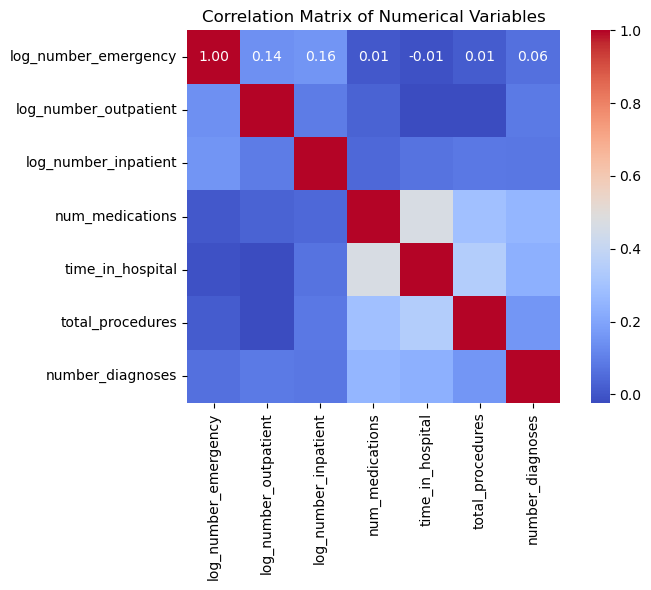

In [125]:
correlation_matrix = df4[numerical_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Variables")
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()

In [66]:
df4=df3.copy()

## PCA on selected numerical features

In [67]:
pca_input = df4[numerical_vars].dropna()

In [68]:
# Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_input)


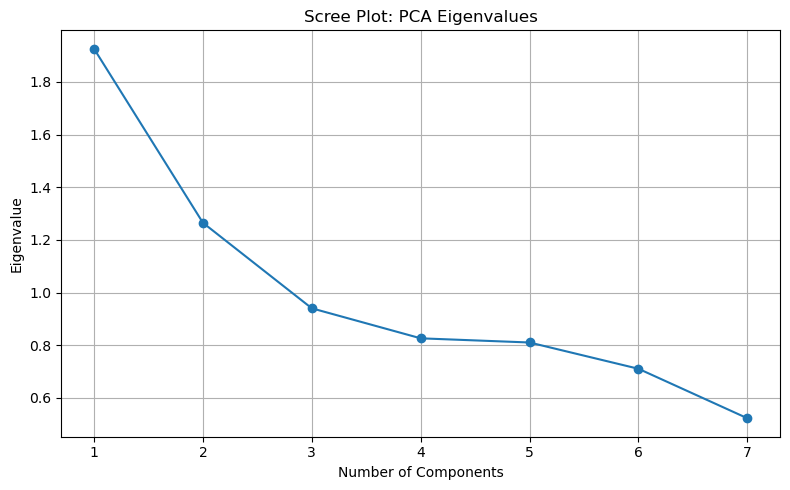

In [69]:
## Apply PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(numerical_vars) + 1), pca.explained_variance_, marker='o')
plt.title("Scree Plot: PCA Eigenvalues")
plt.xlabel("Number of Components")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.tight_layout()

# Save as PNG
plt.savefig("scree_plot_pca.png", dpi=300)  

plt.show()


In [70]:
# Keep first 3 PCs by looking at the Scree Plot

pca = PCA(n_components=3)
X_pca_3 = pca.fit_transform(X_scaled)

# Save for analysis
df_pca = pd.DataFrame(X_pca_3, columns=['PC1', 'PC2', 'PC3'])


In [71]:
# PCA loadings

loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC1', 'PC2', 'PC3'], 
                        index=numerical_vars)
print(loadings.round(3))


                         PC1    PC2    PC3
log_number_emergency   0.069  0.614  0.175
log_number_outpatient  0.056  0.553 -0.607
log_number_inpatient   0.159  0.491  0.617
num_medications        0.543 -0.116 -0.132
time_in_hospital       0.555 -0.166  0.039
total_procedures       0.458 -0.118  0.259
number_diagnoses       0.393  0.145 -0.368


In [72]:
# Rotate the loadings

from factor_analyzer.rotator import Rotator

# Get the original unrotated PCA loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC1', 'PC2', 'PC3'], 
                        index=numerical_vars)

# Apply Varimax rotation
rotator = Rotator()
rotated_loadings = rotator.fit_transform(loadings.values)

# Put into a DataFrame
rotated_df = pd.DataFrame(rotated_loadings, 
                          columns=['PC1_rot', 'PC2_rot', 'PC3_rot'], 
                          index=numerical_vars)

print(rotated_df.round(3))


                       PC1_rot  PC2_rot  PC3_rot
log_number_emergency    -0.078    0.601   -0.215
log_number_outpatient   -0.164    0.087   -0.802
log_number_inpatient     0.092    0.778    0.183
num_medications          0.535   -0.088   -0.178
time_in_hospital         0.579   -0.025   -0.017
total_procedures         0.500    0.128    0.156
number_diagnoses         0.294   -0.044   -0.471


# Cluster Analysis

In [73]:
# Choose the optimal number of clusters through both the Elbow Method and the Silhoutte score.

# Determine safe upper limit for k
n_samples = rotated_df.shape[0]
max_k = min(7, n_samples - 1)  
k_range = range(2, max_k + 1)


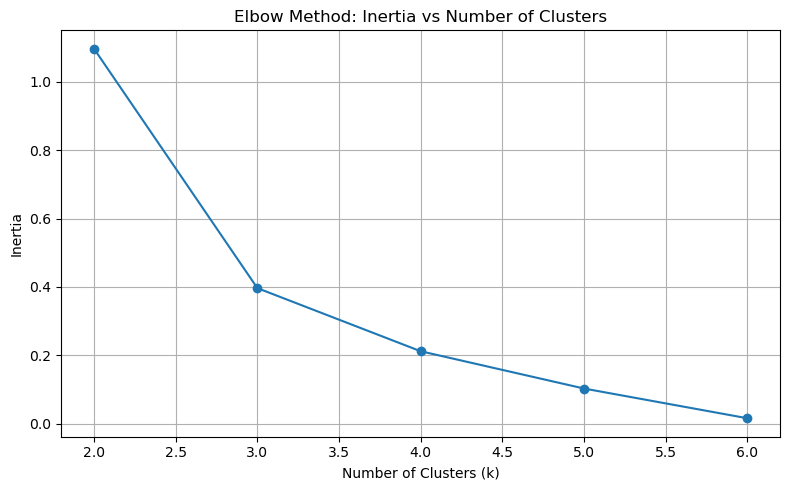

In [77]:
# Elbow Method (Inertia)

from sklearn.cluster import KMeans

inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rotated_df)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method: Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

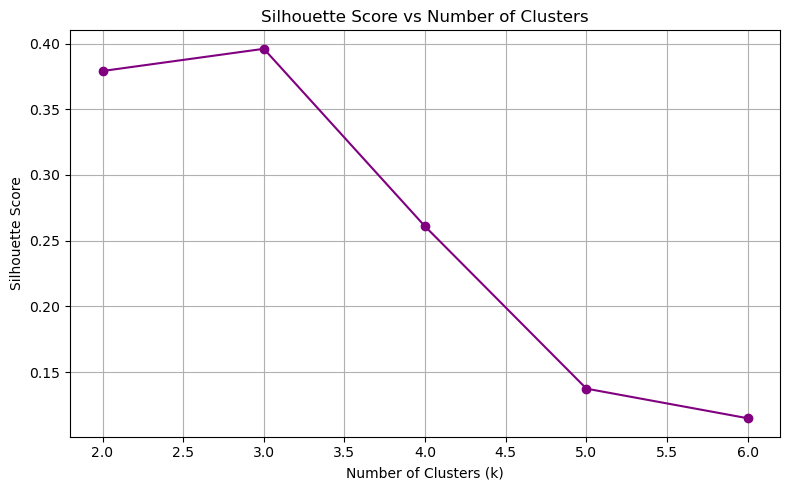

In [78]:
# Silhouette Score

from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(rotated_df)
    score = silhouette_score(rotated_df, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='purple')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.savefig("silhouette_score.png", dpi=300)
plt.show()


Based on the elbow method and Silhoutte Score, we will choose 3 as the optimal number of clusters

In [79]:
# Run K-Means Clustering

rotated_scores = np.dot(X_scaled, rotated_loadings)

# Convert to DataFrame
rotated_scores_df = pd.DataFrame(rotated_scores, columns=['PC1_rot', 'PC2_rot', 'PC3_rot'])

# Now apply KMeans on the rotated scores
kmeans = KMeans(n_clusters=3, random_state=42)
rotated_scores_df['cluster'] = kmeans.fit_predict(rotated_scores_df)

In [87]:
# Add cluster to original data

rotated_scores_df = rotated_scores_df.set_index(pca_input.index)
rotated_scores_df['cluster'] = kmeans.labels_

# Add scores and cluster to original data
df_clustered = df4.copy()
df_clustered[['PC1', 'PC2', 'PC3']] = rotated_scores_df[['PC1_rot', 'PC2_rot', 'PC3_rot']]
df_clustered['cluster'] = rotated_scores_df['cluster']



readmitted      0     1  Total  Readmit_Rate (%)
cluster                                         
1            8297  1340   9637         13.904742
2           35165  2698  37863          7.125690
3           18449  2096  20545         10.201996


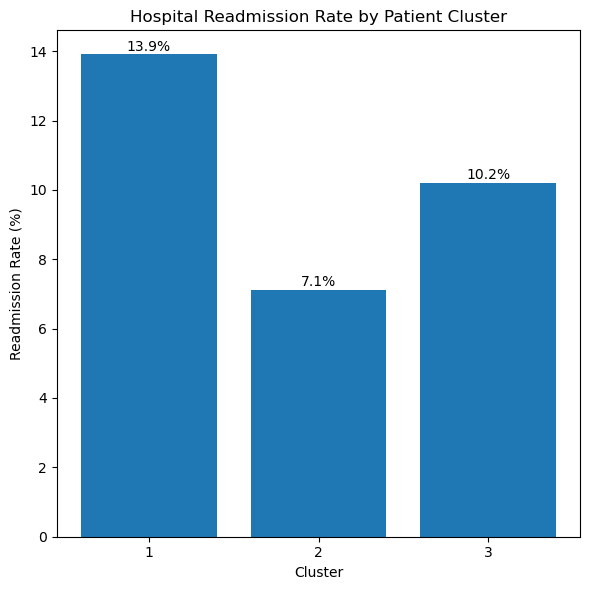

In [88]:
# Analyze Clusters

# Rename cluster labels from 0/1/2 to 1/2/3
df_clustered['cluster'] = df_clustered['cluster'].replace({0: 1, 1: 2, 2: 3})


# Readmission distribution by cluster

readmit_counts = pd.crosstab(df_clustered['cluster'], df_clustered['readmitted'])
readmit_counts['Total'] = readmit_counts.sum(axis=1)
readmit_counts['Readmit_Rate (%)'] = (readmit_counts[1] / readmit_counts['Total']) * 100
print(readmit_counts)

# --- Bar Plot ---
plt.figure(figsize=(6, 6))
bars = plt.bar(
    readmit_counts.index.astype(str),
    readmit_counts['Readmit_Rate (%)']
)

# Add labels to bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{height:.1f}%', ha='center')

plt.xlabel("Cluster")
plt.ylabel("Readmission Rate (%)")
plt.title("Hospital Readmission Rate by Patient Cluster")
plt.tight_layout()

# Save as PNG
plt.savefig("readmissionrate.png", dpi=300)  

plt.show()

In [89]:
# Cluster centroids in PCA space

print(df_clustered.groupby('cluster')[['PC1', 'PC2', 'PC3']].mean())


              PC1       PC2       PC3
cluster                              
1        0.102151  2.218731 -0.498628
2       -0.844562 -0.372959  0.251888
3        1.508553 -0.353399 -0.230323


In [91]:
print(df_clustered['cluster'].value_counts())

cluster
2    37863
3    20545
1     9637
Name: count, dtype: int64


## Model Building

In [126]:
# Count occurence of each class 

print(df_encoded['readmitted'].value_counts())
print(df_encoded['readmitted'].value_counts(normalize=True))  


readmitted
0    61911
1     6134
Name: count, dtype: int64
readmitted
0    0.909854
1    0.090146
Name: proportion, dtype: float64


Around 90% of data belongs to one class (not readmitted) - the model might predict that class for every instance, ignoring the minority class.

## Train-Test Split

In [127]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop(columns='readmitted')  
y = df_encoded['readmitted']

# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  
)

In [129]:
# Check Distribution of Readmitted across Train-Test Set

def print_distribution(y, name):
    print(f"{name} distribution:")
    print(y.value_counts(normalize=True).round(3))
    print()

print_distribution(y_train, "Train")
print_distribution(y_test, "Test")


Train distribution:
readmitted
0    0.91
1    0.09
Name: proportion, dtype: float64

Test distribution:
readmitted
0    0.91
1    0.09
Name: proportion, dtype: float64



## Balancing - Weight

In [171]:
class_weight_dict = {0: 1, 1: 11}


In [172]:
from sklearn.linear_model import LogisticRegression

lr_weighted = LogisticRegression(class_weight=class_weight_dict, random_state=42)
lr_weighted.fit(X_train, y_train)


LogisticRegression(class_weight={0: 1, 1: 11}, random_state=42)

Confusion Matrix:
[[4393 7989]
 [ 346  881]]


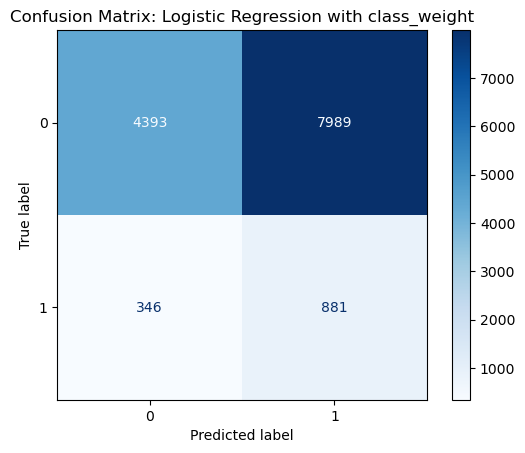

=== Logistic Regression with class_weight ===
              precision    recall  f1-score   support

           0       0.93      0.35      0.51     12382
           1       0.10      0.72      0.17      1227

    accuracy                           0.39     13609
   macro avg       0.51      0.54      0.34     13609
weighted avg       0.85      0.39      0.48     13609



In [173]:
# Evaluate weighted datset on original (imbalanced) test set
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_weighted = lr_weighted.predict(X_test)

# Print numeric confusion matrix
cm = confusion_matrix(y_test, y_pred_weighted)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Logistic Regression with class_weight")
plt.show()
print("=== Logistic Regression with class_weight ===")
print(classification_report(y_test, y_pred_weighted))

In [186]:
from sklearn.metrics import precision_score, recall_score, f1_score

for thresh in [0.30, 0.4, 0.43, 0.45, 0.5]:
    y_pred_t = (y_proba >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)
    print(f"Threshold: {thresh:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")


Threshold: 0.3000 | Precision: 0.0902 | Recall: 1.0000 | F1: 0.1654
Threshold: 0.4000 | Precision: 0.0916 | Recall: 0.9772 | F1: 0.1674
Threshold: 0.4300 | Precision: 0.0934 | Recall: 0.9503 | F1: 0.1701
Threshold: 0.4500 | Precision: 0.0943 | Recall: 0.9128 | F1: 0.1709
Threshold: 0.5000 | Precision: 0.0993 | Recall: 0.7180 | F1: 0.1745



Confusion Matrix (Threshold = 0.4):
[[  485 11897]
 [   28  1199]]


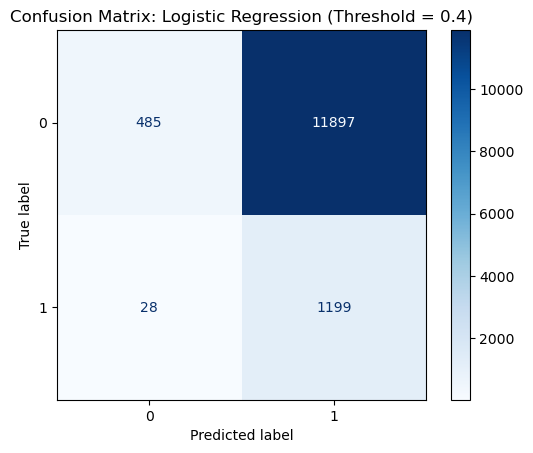

=== Classification Report (Threshold = 0.4) ===
              precision    recall  f1-score   support

           0       0.95      0.04      0.08     12382
           1       0.09      0.98      0.17      1227

    accuracy                           0.12     13609
   macro avg       0.52      0.51      0.12     13609
weighted avg       0.87      0.12      0.08     13609



In [184]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

for threshold in [0.4]:
    y_pred = (y_proba >= threshold).astype(int)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix (Threshold = {threshold}):")
    print(cm)
    
    # Plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix: Logistic Regression (Threshold = {threshold})")
    plt.show()

    # Classification Report
    print(f"=== Classification Report (Threshold = {threshold}) ===")
    print(classification_report(y_test, y_pred))
